In [1]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import xgboost as xgb

In [2]:
from matplotlib import pyplot as plt

# classification

In [3]:
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest = xgb.DMatrix('data/agaricus.txt.test')

[23:34:35] 6513x127 matrix with 143286 entries loaded from data/agaricus.txt.train
[23:34:35] 1611x127 matrix with 35442 entries loaded from data/agaricus.txt.test


In [4]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = ['ams@0', 'auc']
param['booster'] = 'dart'
param['rate_drop'] = 0.1

In [6]:
param = {'booster': 'dart',
         'max_depth': 2,# 'learning_rate': 0.1,
         'nthread': 4,
         'objective': 'binary:logistic',
#         'sample_type': 'uniform',
            'eta': 1,
         'eval_metric': ['ams@0', 'auc'],
#         'normalize_type': 'tree',
         'rate_drop': 0.1,
        'skip_drop': 0.5
        }

In [7]:
param

{'booster': 'dart',
 'max_depth': 2,
 'nthread': 4,
 'objective': 'binary:logistic',
 'eta': 1,
 'eval_metric': ['ams@0', 'auc'],
 'rate_drop': 0.1,
 'skip_drop': 0.5}

In [8]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

## training

In [9]:
# help(xgb.Booster)

In [10]:
# help(xgb.train)

In [11]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-ams@0:51.66892	eval-auc:0.96037	train-ams@0:105.76200	train-auc:0.95823
[1]	eval-ams@0:59.85018	eval-auc:0.97993	train-ams@0:129.31781	train-auc:0.98141
[2]	eval-ams@0:65.67127	eval-auc:0.99852	train-ams@0:150.68054	train-auc:0.99707
[3]	eval-ams@0:65.67127	eval-auc:0.99894	train-ams@0:159.05955	train-auc:0.99876
[4]	eval-ams@0:71.53587	eval-auc:0.99983	train-ams@0:170.35240	train-auc:0.99930
[5]	eval-ams@0:72.86146	eval-auc:1.00000	train-ams@0:172.82704	train-auc:0.99958
[6]	eval-ams@0:72.86146	eval-auc:1.00000	train-ams@0:172.82704	train-auc:0.99958
[7]	eval-ams@0:72.86146	eval-auc:1.00000	train-ams@0:172.82704	train-auc:0.99992
[8]	eval-ams@0:72.86146	eval-auc:1.00000	train-ams@0:172.82704	train-auc:0.99992
[9]	eval-ams@0:72.86146	eval-auc:1.00000	train-ams@0:173.09306	train-auc:1.00000


In [12]:
bst.best_iteration

9

## save & load

In [13]:
bst.save_model('0001.model')

In [14]:
bst.dump_model('dump.raw.txt')

In [15]:
bst_load = xgb.Booster({"nthread": 4})
bst_load.load_model("0001.model")

## prediction

In [16]:
ypred = bst.predict(dtest)

In [17]:
precision_recall_curve(dtest.get_label(), ypred)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.97551546, 0.94716495, 0.93943299, 0.84020619,
        0.7693299 , 0.46520619, 0.15463918, 0.1507732 , 0.00515464,
        0.        ]),
 array([0.911939  , 0.9537884 , 0.96561974, 0.9884467 , 0.9970445 ,
        0.99794847, 0.9981102 , 0.99813443, 0.99881005, 0.9994747 ],
       dtype=float32))

In [18]:
fpr, tpr, thresholds = roc_curve(dtest.get_label(), ypred)
roc_auc_score(dtest.get_label(), ypred)

1.0

In [19]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01197605, 0.02634731, 0.03952096, 0.06826347,
        0.11856287, 0.18083832, 0.22874251, 0.25269461, 0.71736527,
        0.88263473, 0.94491018, 0.96287425, 0.98562874, 0.99401198,
        1.        ]),
 array([0.        , 0.00515464, 0.1507732 , 0.15463918, 0.46520619,
        0.7693299 , 0.84020619, 0.93943299, 0.94716495, 0.97551546,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.9994748e+00, 9.9947470e-01, 9.9881005e-01, 9.9813443e-01,
        9.9811018e-01, 9.9794847e-01, 9.9704450e-01, 9.8844671e-01,
        9.6561974e-01, 9.5378840e-01, 9.1193902e-01, 1.1789363e-01,
        3.9157234e-02, 3.7961718e-02, 2.6636455e-02, 1.2314710e-02,
    

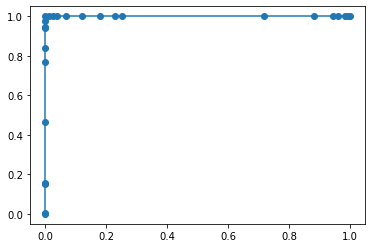

In [20]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, 'o-')

## plotting

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

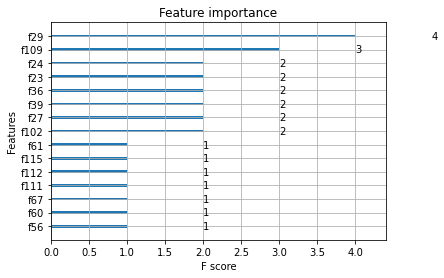

In [21]:
xgb.plot_importance(bst)

<AxesSubplot:>

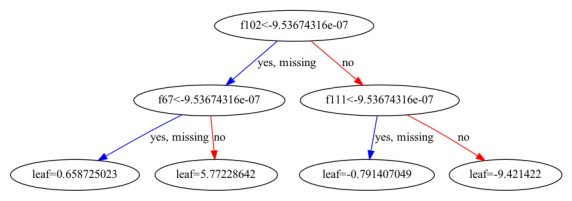

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_tree(bst,num_trees=2, ax=ax)

In [23]:
help(xgb.plot_tree)

Help on function plot_tree in module xgboost.plotting:

plot_tree(booster, fmap='', num_trees=0, rankdir=None, ax=None, **kwargs)
    Plot specified tree.
    
    Parameters
    ----------
    booster : Booster, XGBModel
        Booster or XGBModel instance
    fmap: str (optional)
       The name of feature map file
    num_trees : int, default 0
        Specify the ordinal number of target tree
    rankdir : str, default "TB"
        Passed to graphiz via graph_attr
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    kwargs :
        Other keywords passed to to_graphviz
    
    Returns
    -------
    ax : matplotlib Axes



In [24]:
precision_recall_curve(dtest.get_label(), ypred)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.97551546, 0.94716495, 0.93943299, 0.84020619,
        0.7693299 , 0.46520619, 0.15463918, 0.1507732 , 0.00515464,
        0.        ]),
 array([0.911939  , 0.9537884 , 0.96561974, 0.9884467 , 0.9970445 ,
        0.99794847, 0.9981102 , 0.99813443, 0.99881005, 0.9994747 ],
       dtype=float32))

In [25]:
fpr, tpr, thresholds = roc_curve(dtest.get_label(), ypred)
roc_auc_score(dtest.get_label(), ypred)

1.0

In [26]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01197605, 0.02634731, 0.03952096, 0.06826347,
        0.11856287, 0.18083832, 0.22874251, 0.25269461, 0.71736527,
        0.88263473, 0.94491018, 0.96287425, 0.98562874, 0.99401198,
        1.        ]),
 array([0.        , 0.00515464, 0.1507732 , 0.15463918, 0.46520619,
        0.7693299 , 0.84020619, 0.93943299, 0.94716495, 0.97551546,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.9994748e+00, 9.9947470e-01, 9.9881005e-01, 9.9813443e-01,
        9.9811018e-01, 9.9794847e-01, 9.9704450e-01, 9.8844671e-01,
        9.6561974e-01, 9.5378840e-01, 9.1193902e-01, 1.1789363e-01,
        3.9157234e-02, 3.7961718e-02, 2.6636455e-02, 1.2314710e-02,
    

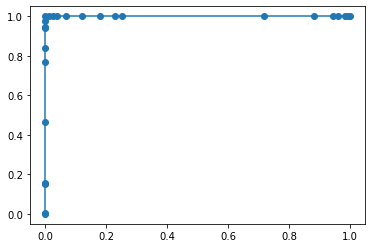

In [27]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, 'o-')

# regression

In [28]:
from sklearn.model_selection import RepeatedKFold

In [29]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot

In [30]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [31]:
X, y = dataframe.iloc[:, :-1], dataframe.iloc[:, -1]

In [32]:
X.shape, y.shape

((506, 13), (506,))

In [33]:
help(xgb.XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(objective='reg:squarederror', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Spec

In [34]:
reg = xgb.XGBRegressor(verbosity=2, max_depth=3)

In [35]:
help(reg.fit)

Help on method fit in module xgboost.sklearn:

fit(X, y, sample_weight=None, base_margin=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, callbacks=None) method of xgboost.sklearn.XGBRegressor instance
    Fit gradient boosting model
    
    Parameters
    ----------
    X : array_like
        Feature matrix
    y : array_like
        Labels
    sample_weight : array_like
        instance weights
    base_margin : array_like
        global bias for each instance.
    eval_set : list, optional
        A list of (X, y) tuple pairs to use as validation sets, for which
        metrics will be computed.
        Validation metrics will help us track the performance of the model.
    sample_weight_eval_set : list, optional
        A list of the form [L_1, L_2, ..., L_n], where each L_i is a list of
        instance weights on the i-th validation set.
    eval_metric : str, list of str, or callable, optional
        

In [36]:
reg.fit(X, y, verbose=True)

[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:35:00] INFO: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [37]:
dir(reg)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'apply',
 'base_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max_delta_step',
 'max_depth',
 'min_child_w

In [38]:
reg.n_estimators

100

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

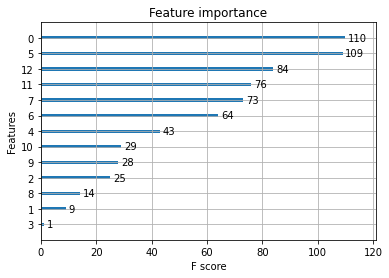

In [39]:
xgb.plot_importance(reg)

<AxesSubplot:>

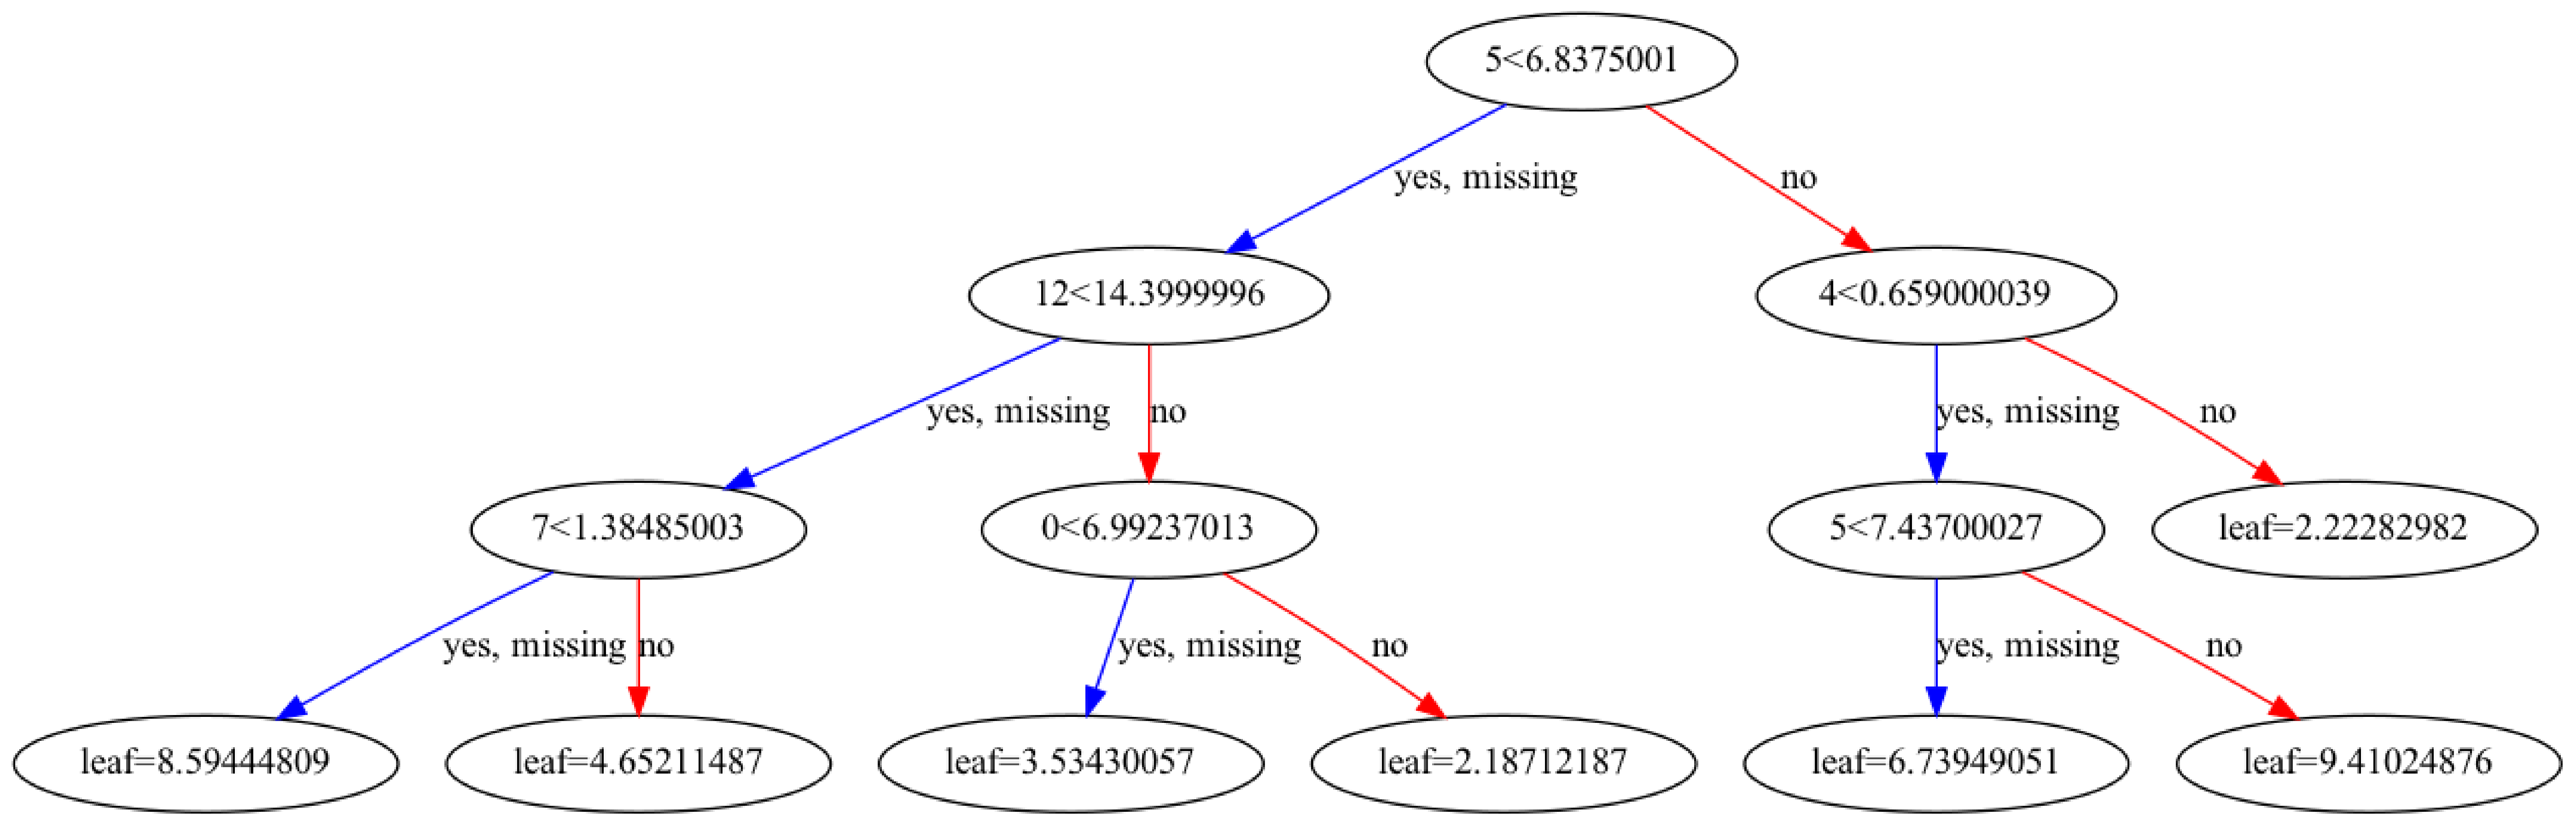

In [40]:
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(reg, num_trees=1, ax=ax)